In [38]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
from datetime import datetime, date, time, timezone
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix



In [7]:
GM_input = pd.read_csv('/Users/elle.le/Workspace/BoxSize_local/result_GM.csv', 
                       usecols = ['order_number','FedEx_box_label'])

In [8]:
GM_input

,order_number,FedEx_box_label
0,QSKB-D6JS,1
1,7LLC-W4TP,1
2,BY1S-JJZ8,1
3,7PCH-8WW9,1
4,1WY4-QKBK,3
...,...,...
8504,BDSD-PCRY,0
8505,FBDB-RD17,0
8506,R1RL-B13M,0
8507,PJPD-13FP,1


In [9]:
# Old model without total items volumne: df = pd.read_csv('GM_box_size_clean_data.csv')
old_df = pd.read_csv('/Users/elle.le/Workspace/BoxSize_local/GM_box_size_clean_data_2509131600.csv')

In [10]:
old_df.shape

(7971, 7)

In [26]:
df = old_df.merge(right = GM_input, on ='order_number', how = 'left')
df.dropna(inplace = True)

In [27]:
df.drop(columns = ['FedEx_box_type','order_number'], inplace = True)

In [28]:
df.head()

,item_size_0,item_size_1,item_size_2,item_size_3,total_order_vol,FedEx_box_label
0,1.0,1.0,0,0.0,50.68512,1.0
1,1.0,1.0,0,0.0,64.80474,1.0
2,0.0,7.0,0,0.0,58.02192,4.0
3,1.0,0.0,0,0.0,86.32980,1.0
4,0.0,1.0,0,0.0,11.22498,0.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7495 entries, 0 to 7970
Data columns (total 6 columns):
item_size_0        7495 non-null float64
item_size_1        7495 non-null float64
item_size_2        7495 non-null int64
item_size_3        7495 non-null float64
total_order_vol    7495 non-null float64
FedEx_box_label    7495 non-null float64
dtypes: float64(5), int64(1)
memory usage: 409.9 KB


In [30]:
df.shape

(7495, 6)

In [31]:
df['FedEx_box_label'].value_counts()

1.0    3796
0.0    2761
3.0     750
2.0     101
4.0      87
Name: FedEx_box_label, dtype: int64

In [32]:
# Keep the ratio of different box sizes
x_train,x_test,y_train, y_test = train_test_split(df.iloc[:,0:5], df['FedEx_box_label'], 
                                                  stratify = df['FedEx_box_label'])

In [33]:
y_train.value_counts()/y_train.shape[0]*100

1.0    50.649351
0.0    36.843978
3.0     9.998221
2.0     1.352073
4.0     1.156378
Name: FedEx_box_label, dtype: float64

In [49]:
# Try Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(x_train,y_train)
print('Random Forest train score',rf.score(x_train,y_train))
print('Random Forest test score',rf.score(x_test,y_test))

Random Forest train score 0.8811599359544565
Random Forest test score 0.8313767342582711


In [45]:
y_test.value_counts()

1.0    949
0.0    690
3.0    188
2.0     25
4.0     22
Name: FedEx_box_label, dtype: int64

In [51]:
pd.DataFrame(confusion_matrix(y_test, rf.predict(x_test)))

,0,1,2,3,4
0,649,41,0,0,0
1,121,781,0,47,0
2,0,12,1,12,0
3,0,62,2,118,6
4,0,1,0,12,9


In [52]:
pd.DataFrame(confusion_matrix(y_train, rf.predict(x_train)))

,0,1,2,3,4
0,1978,93,0,0,0
1,294,2475,0,78,0
2,0,32,17,27,0
3,0,133,0,429,0
4,0,2,0,9,54


In [11]:
# Try GBC
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
print('GB train score',gb.score(x_train,y_train))
print('GB test score',gb.score(x_test,y_test))

GB train score 0.877718300434928
GB test score 0.8645258404415455


In [12]:
#Decision Tree
dt = DecisionTreeClassifier(class_weight='balanced') 
dt.fit(x_train,y_train)
print('Decision Tree train score',dt.score(x_train,y_train))
print('Decision Tree test score',dt.score(x_test,y_test))

Decision Tree train score 0.8961191033790565
Decision Tree test score 0.8334169593577522


In [36]:
x_train

,item_size_0,item_size_1,item_size_2,item_size_3,total_order_vol
5400,0.0,1.000000,0,1.0,58.02498
1229,0.0,3.000000,0,0.0,11.22498
2644,0.0,2.000000,0,0.0,11.22498
633,1.0,1.000000,0,0.0,84.17238
6085,1.0,2.000000,0,0.0,48.22296
...,...,...,...,...,...
6574,0.0,1.000000,0,0.0,16.58178
2819,0.0,1.000000,0,0.0,38.59002
5409,0.0,1.000000,0,0.0,11.22498
4377,2.0,1.666667,0,2.0,194.01570


In [13]:

#from sklearn.utils.class_weight import compute_class_weight

#weights = compute_class_weight('balanced', classes=list(range(6)), y=y_train)
#print(weights)

In [14]:
# Add prediction into original data (Decision Tree)
df['prediction'] = dt.predict(df.iloc[:,:5])
df.head(6)

,item_size_0,item_size_1,item_size_2,item_size_3,total_order_vol,FedEx_box_type,prediction
0,1.0,1.0,0,0.0,50.68512,1,1
1,1.0,1.0,0,0.0,64.80474,1,1
2,0.0,7.0,0,0.0,58.02192,2,2
3,1.0,0.0,0,0.0,86.32980,1,1
4,0.0,1.0,0,0.0,11.22498,0,0
5,1.0,0.0,0,0.0,36.90360,0,0


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['FedEx_box_label'], df['prediction'])
#row = predicted, column = actual class

KeyError: 'prediction'

In [16]:
x_test['predict'] = dt.predict(x_test)
x_test

,item_size_0,item_size_1,item_size_2,item_size_3,total_order_vol,predict
6341,1.0,1.0,0,0.0,36.99798,0
4998,1.0,0.0,0,0.0,25.77300,0
4982,1.0,1.0,0,0.0,50.10054,1
5144,1.0,1.0,0,0.0,47.61720,1
4464,1.0,0.0,0,0.0,25.77300,0
...,...,...,...,...,...,...
1675,1.0,1.0,0,0.0,32.09274,1
4671,3.0,4.5,0,0.0,85.12656,2
275,0.0,0.0,1,0.0,320.76000,2
2894,1.0,1.0,0,1.0,153.98880,2


In [39]:
confusion_matrix(y_test, rf.predict(x_test.iloc[:,:-1]))

ValueError: Number of features of the model must match the input. Model n_features is 5 and input n_features is 4 

In [18]:
dt.predict(np.array([13,1,1,0,100]).reshape(1,-1))

array([2])

In [19]:
df.columns

Index(['item_size_0', 'item_size_1', 'item_size_2', 'item_size_3',
       'total_order_vol', 'FedEx_box_type', 'prediction'],
      dtype='object')

In [20]:
dt.feature_importances_

array([5.31544373e-02, 1.94915682e-01, 2.16933251e-05, 1.36081819e-02,
       7.38300005e-01])

In [21]:
df.loc[df['item_size_3'] > 0]

,item_size_0,item_size_1,item_size_2,item_size_3,total_order_vol,FedEx_box_type,prediction
12,0.0,0.000000,0,1.0,51.54600,0,0
17,0.0,2.000000,0,2.0,62.77098,2,2
29,1.0,0.000000,0,1.0,118.02516,2,2
33,1.0,1.000000,0,1.0,83.79798,1,1
40,1.0,1.000000,0,1.0,83.79798,1,1
...,...,...,...,...,...,...,...
7932,0.0,1.000000,0,1.0,174.11436,1,2
7941,0.0,0.000000,0,1.0,77.31900,1,1
7950,0.0,0.000000,0,1.0,77.31900,1,1
7957,1.0,1.000000,0,1.0,129.25014,2,2


In [34]:
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file="/Users/elle.le/Workspace/BoxSize/tree.dot", class_names=['Small','Medium','Large','XLarge'],
feature_names=['item_size_0', 'item_size_1', 'item_size_2','item_size_3','total_vol'], impurity=False, filled=True)

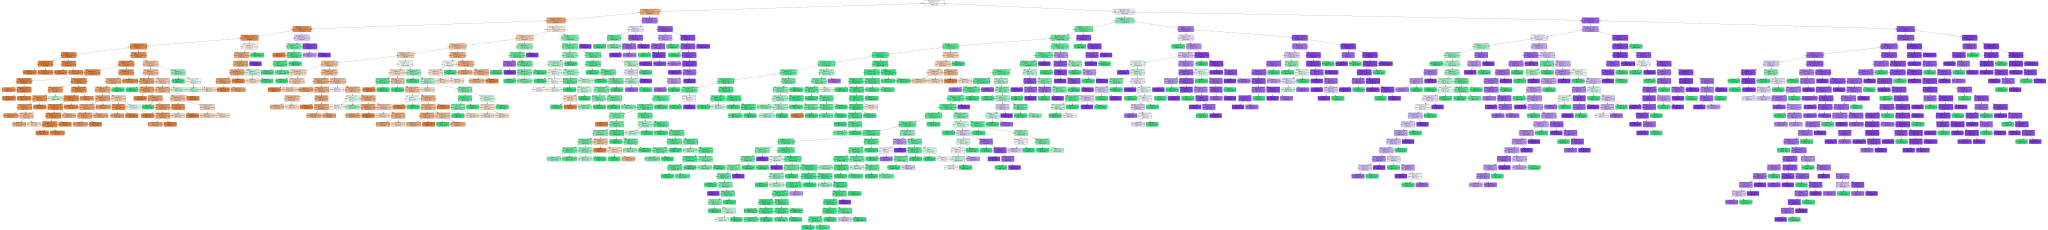

In [35]:
import graphviz
with open("/Users/elle.le/Workspace/BoxSize/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Run this on Terminal:
dot -Tpng tree.dot -o tree.png